In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import numpys

In [2]:
notebook_name = os.path.basename(os.getcwd())
timestamp="07"

In [3]:
version="_ver2.1"

In [4]:
path_movie_dir = '../data/movie/fps30_mask/'
path_save_dir = os.path.join('../data/03_PlotPoints'+version+'/', timestamp)
if not os.path.exists(path_save_dir):
    os.makedirs(path_save_dir)

In [5]:
path_action_dir = os.path.join('../data/01_DataProcessing/', timestamp)
path_point_dir = os.path.join('../data/02_GetPoints'+version+'/', timestamp)

In [6]:
file_names = ['fall','sitdown', 'standup']
# file_names = ['forehand']
movie_names = [file_name + '.MOV' for file_name in file_names]
points_file_names = [file_name + version + '.csv' for file_name in file_names]

In [7]:
path_label_name_file = '../data/labels/labels_num'+version+'.csv'

In [8]:
num = 0
path_action = os.path.join(path_action_dir, points_file_names[num])
path_point = os.path.join(path_point_dir, points_file_names[num])
action_df = pd.read_csv(path_action)
point_df = pd.read_csv(path_point)

In [9]:
point_df.head()

,Unnamed: 0,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,...,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y
0,0,0.400000,0.028986,0.511111,0.173913,0.200000,0.188406,0.088889,0.376812,0.0,...,0.888889,0.985507,0.355556,0.000000,0.466667,0.0,0.266667,0.028986,0.600000,0.028986
1,1,0.369565,0.028986,0.478261,0.173913,0.195652,0.188406,0.086957,0.376812,0.0,...,0.869565,1.000000,0.326087,0.014493,0.434783,0.0,0.260870,0.028986,0.565217,0.028986
2,2,0.369565,0.028986,0.456522,0.173913,0.173913,0.202899,0.065217,0.391304,0.0,...,0.913043,1.000000,0.326087,0.014493,0.434783,0.0,0.239130,0.028986,0.565217,0.028986
3,3,0.369565,0.014706,0.456522,0.147059,0.152174,0.176471,0.065217,0.382353,0.0,...,0.913043,1.000000,0.326087,0.000000,0.434783,0.0,0.239130,0.014706,0.543478,0.014706
4,4,0.355556,0.014925,0.444444,0.149254,0.155556,0.179104,0.066667,0.373134,0.0,...,0.933333,1.000000,0.311111,0.000000,0.422222,0.0,0.244444,0.029851,0.555556,0.014925


In [15]:
label_names = pd.read_csv(path_label_name_file)

In [16]:
objective = 'action_gt_name'

In [17]:

action_dict = label_names.to_dict()[objective]

In [18]:
body_parts_list = ["Nose_x","Nose_y","Neck_x","Neck_y","RShoulder_x","RShoulder_y","RElbow_x","RElbow_y","RWrist_x","RWrist_y","LShoulde_x""LShoulde_y","LElbow_x","LElbow_y","LWrist_x","LWrist_y","RHip_x","RHip_y","RKnee_x","RKnee_y","RAnkle_x","RAnkle_y","LHip_x","LHip_y","LKnee_x","LKnee_y","LAnkle_x","LAnkle_y","REye_x","REye_y","LEye_x","LEye_y","REar_x","REar_y","LEar_x","LEar_y"
]

In [19]:
times = np.arange(0, len(point_df))

In [20]:
start = 0
end = max(times)

In [21]:
body_parts = ["Nose_x","Nose_y","Neck_x","Neck_y","RShoulder_x","RShoulder_y","RElbow_x","RElbow_y","RWrist_x","RWrist_y","LShoulde_x","LShoulde_y","LElbow_x","LElbow_y","LWrist_x","LWrist_y","RHip_x","RHip_y","RKnee_x","RKnee_y","RAnkle_x","RAnkle_y","LHip_x","LHip_y","LKnee_x","LKnee_y","LAnkle_x","LAnkle_y","REye_x","REye_y","LEye_x","LEye_y","REar_x","REar_y","LEar_x","LEar_y"
]
body_parts

['Nose_x',
 'Nose_y',
 'Neck_x',
 'Neck_y',
 'RShoulder_x',
 'RShoulder_y',
 'RElbow_x',
 'RElbow_y',
 'RWrist_x',
 'RWrist_y',
 'LShoulde_x',
 'LShoulde_y',
 'LElbow_x',
 'LElbow_y',
 'LWrist_x',
 'LWrist_y',
 'RHip_x',
 'RHip_y',
 'RKnee_x',
 'RKnee_y',
 'RAnkle_x',
 'RAnkle_y',
 'LHip_x',
 'LHip_y',
 'LKnee_x',
 'LKnee_y',
 'LAnkle_x',
 'LAnkle_y',
 'REye_x',
 'REye_y',
 'LEye_x',
 'LEye_y',
 'REar_x',
 'REar_y',
 'LEar_x',
 'LEar_y']

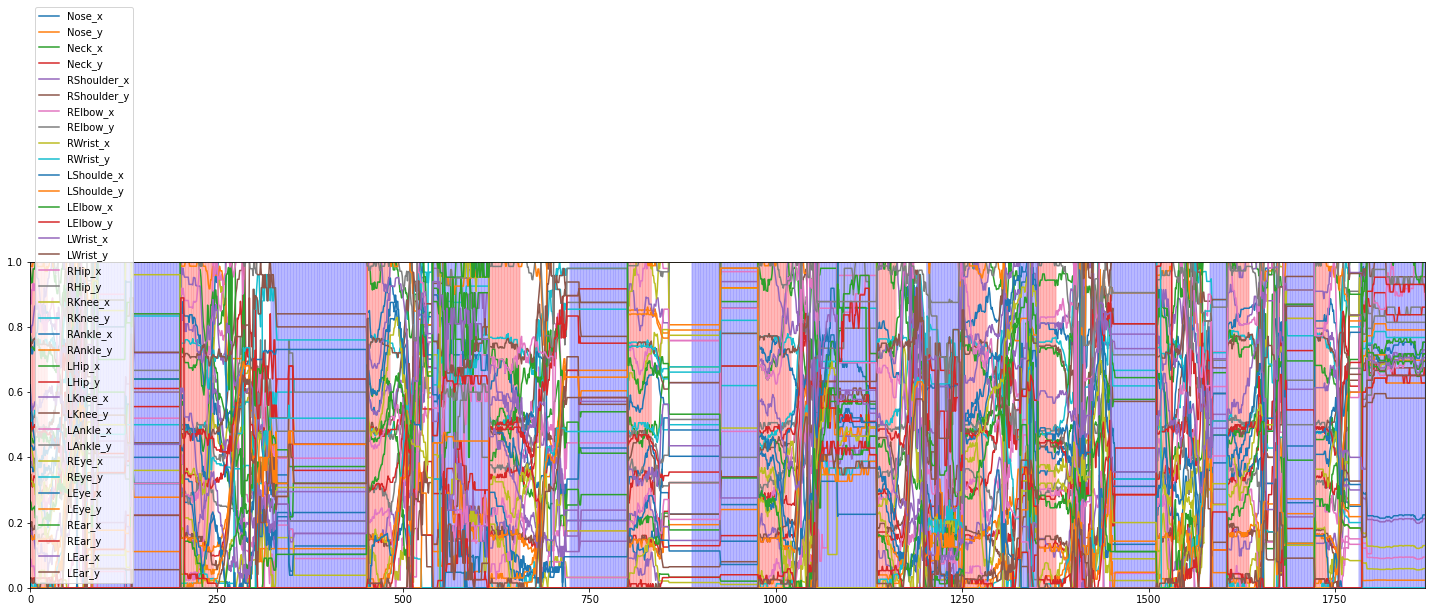

In [22]:
plt.figure(figsize=(25,6))
for body_part in body_parts:
    plt.plot(times, point_df[body_part], label=body_part)
    plt.xlim(0, end)
    plt.ylim(0, 1)
    
for frame_count in action_df.index:
    action = action_df.loc[frame_count]['action_gt_num']
    if action == 1:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "red", alpha=0.1)
    elif action == 2:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "blue", alpha=0.1)
    elif action == 3:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "green", alpha=0.1)
    elif action == 4:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "yellow", alpha=0.1)
plt.legend()
plt.show()

In [23]:
actions = action_df['action_gt_num']

In [24]:

action_start = []
action_end = []
action_types = []

last_action = 0
idle = 0
for num, action in enumerate(actions):
    if (action != last_action) and (action != 0):
        action_start.append(num)
        action_types.append(action)
    elif (action != last_action) and (action == 0):
        action_end.append(num)
    last_action = action
action_types = np.asarray(action_types)
action_start = np.asarray(action_start)
action_end = np.asarray(action_end)

In [25]:
action_ranges = np.empty((0 ,3))
action_range = np.zeros(3)

last_action = 0
idle = 0
for num, action in enumerate(actions):
    
    if (action != last_action) and (action != 0):
        action_range[0] = num
        action_range[2] = action
    elif (action != last_action) and (action == 0):
        action_range[1] = num
        action_ranges = np.vstack([action_ranges, action_range])
        action_range = np.zeros(3)
    last_action = action
action_ranges = action_ranges.astype(int)

In [26]:
action_dict

{0: 'idle', 1: 'stand', 2: 'fall', 3: 'sitdown'}

In [28]:
action_color = {'stand': 'green', 'fall': 'red', 'sittingdown': 'blue'}
action_num_color_dict = {0: 'green', 1: 'red', 2: 'blue', 3: 'orange'}

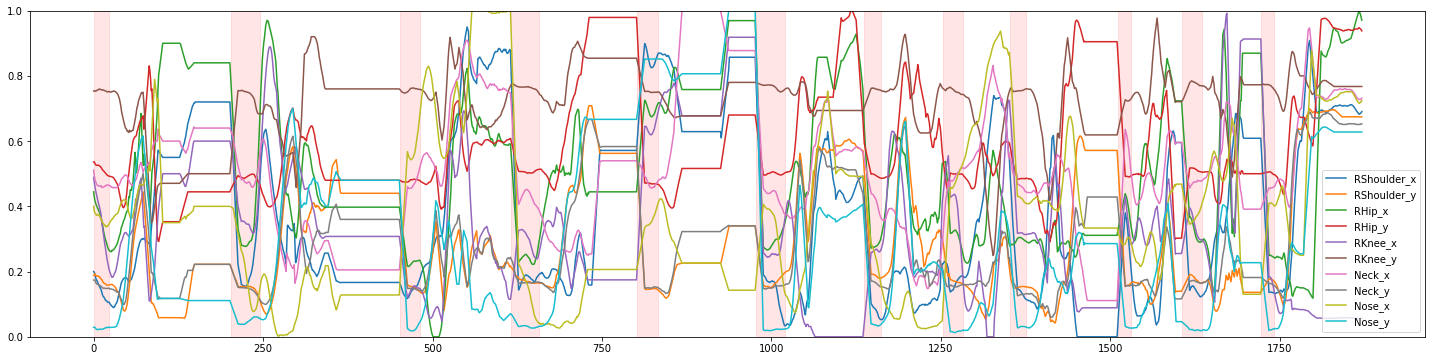

In [29]:

plt.figure(figsize=(25,6))
for action_range in action_ranges:
    plt.axvspan(action_range[0], action_range[1], 0, 1, color = action_num_color_dict[action_range[2]], alpha=0.1)

for body_part in ['RShoulder_x',
 'RShoulder_y',
 'RHip_x',
 'RHip_y',
 'RKnee_x',
 'RKnee_y',
 'Neck_x',
 'Neck_y',
 'Nose_x',
 'Nose_y',
                 ]:
    plt.plot(times, point_df.rolling(12, min_periods=1).mean()[body_part], label=body_part)
    #plt.xlim(3000, 4000)
    plt.ylim(0, 1)
        
plt.legend(loc='lower right')
plt.show()

In [30]:
num = 2
path_action = os.path.join(path_action_dir, points_file_names[num])
path_point = os.path.join(path_point_dir, points_file_names[num])
action_df = pd.read_csv(path_action)
point_df = pd.read_csv(path_point)
label_names = pd.read_csv(path_label_name_file)
objective = 'action_gt_name'
action_dict = label_names.to_dict()[objective]
body_parts_list = ["Nose_x","Nose_y","Neck_x","Neck_y","RShoulder_x","RShoulder_y","RElbow_x","RElbow_y","RWrist_x","RWrist_y","LShoulde_x""LShoulde_y","LElbow_x","LElbow_y","LWrist_x","LWrist_y","RHip_x","RHip_y","RKnee_x","RKnee_y","RAnkle_x","RAnkle_y","LHip_x","LHip_y","LKnee_x","LKnee_y","LAnkle_x","LAnkle_y","REye_x","REye_y","LEye_x","LEye_y","REar_x","REar_y","LEar_x","LEar_y"
]
times = np.arange(0, len(point_df))
start = 0
end = max(times)
body_parts = ["Nose_x","Nose_y","Neck_x","Neck_y","RShoulder_x","RShoulder_y","RElbow_x","RElbow_y","RWrist_x","RWrist_y","LShoulde_x","LShoulde_y","LElbow_x","LElbow_y","LWrist_x","LWrist_y","RHip_x","RHip_y","RKnee_x","RKnee_y","RAnkle_x","RAnkle_y","LHip_x","LHip_y","LKnee_x","LKnee_y","LAnkle_x","LAnkle_y","REye_x","REye_y","LEye_x","LEye_y","REar_x","REar_y","LEar_x","LEar_y"
]

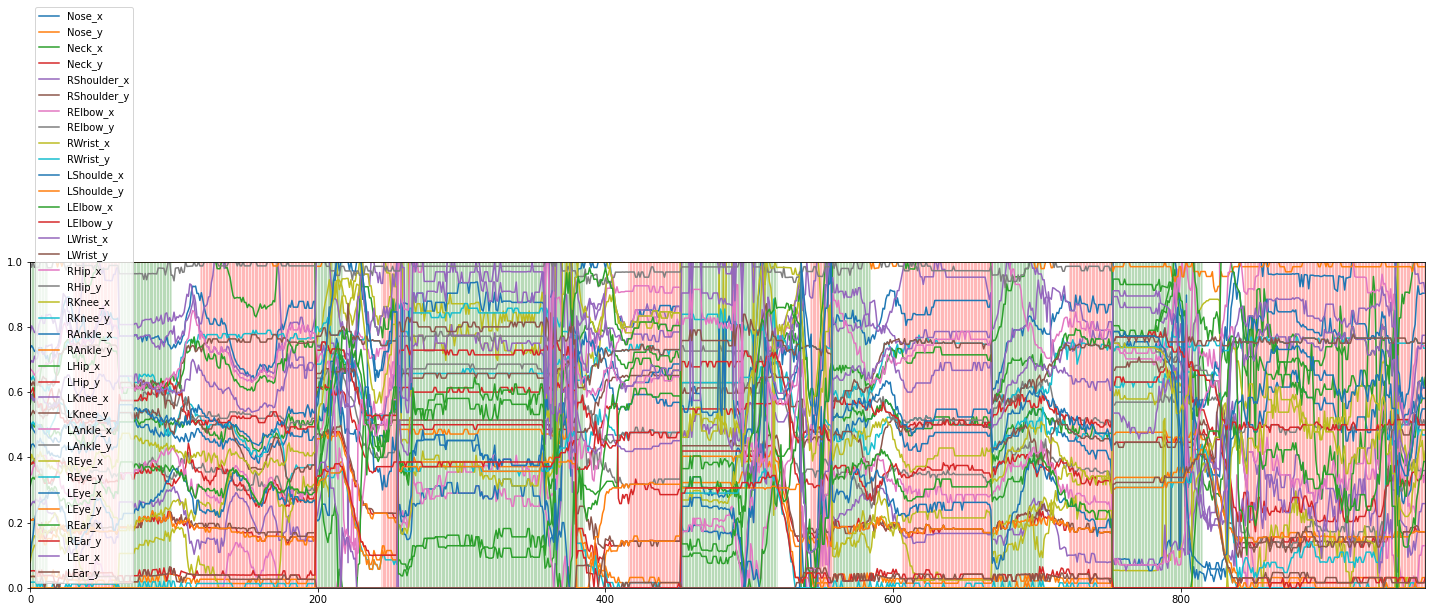

In [31]:
plt.figure(figsize=(25,6))
for body_part in body_parts:
    plt.plot(times, point_df[body_part], label=body_part)
    plt.xlim(0, end)
    plt.ylim(0, 1)
    
for frame_count in action_df.index:
    action = action_df.loc[frame_count]['action_gt_num']
    if action == 1:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "red", alpha=0.1)
    elif action == 2:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "blue", alpha=0.1)
    elif action == 3:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "green", alpha=0.1)
    elif action == 4:
        plt.axvspan(frame_count, frame_count+1, 0, 1, color = "yellow", alpha=0.1)
plt.legend()
plt.show()

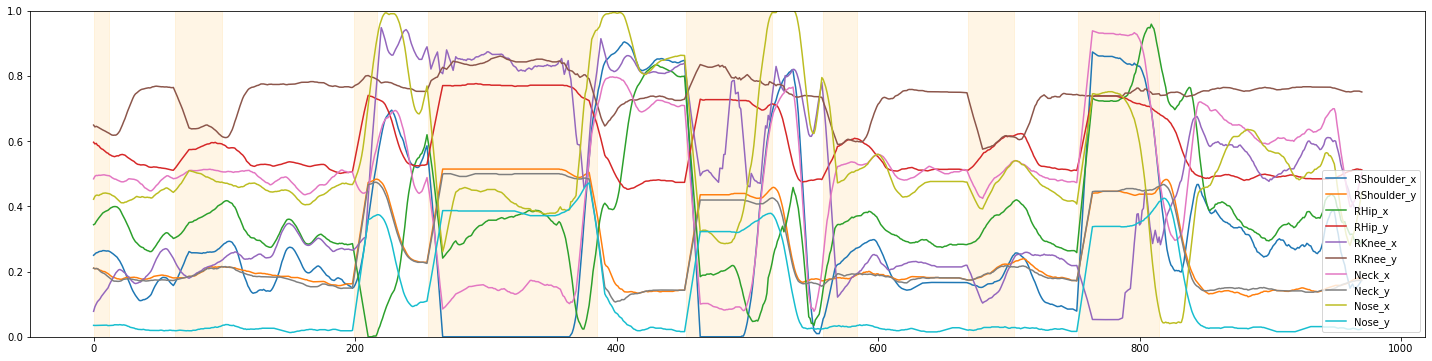

In [32]:
actions = action_df['action_gt_num']
action_start = []
action_end = []
action_types = []

last_action = 0
idle = 0
for num, action in enumerate(actions):
    if (action != last_action) and (action != 0):
        action_start.append(num)
        action_types.append(action)
    elif (action != last_action) and (action == 0):
        action_end.append(num)
    last_action = action
action_types = np.asarray(action_types)
action_start = np.asarray(action_start)
action_end = np.asarray(action_end)

action_ranges = np.empty((0 ,3))
action_range = np.zeros(3)

last_action = 0
idle = 0
for num, action in enumerate(actions):
    
    if (action != last_action) and (action != 0):
        action_range[0] = num
        action_range[2] = action
    elif (action != last_action) and (action == 0):
        action_range[1] = num
        action_ranges = np.vstack([action_ranges, action_range])
        action_range = np.zeros(3)
    last_action = action
action_ranges = action_ranges.astype(int)
action_color = {'stand': 'green', 'fall': 'red', 'sittingdown': 'blue'}
action_num_color_dict = {0: 'green', 1: 'red', 2: 'blue', 3: 'orange', 4: 'skyblue'}
plt.figure(figsize=(25,6))
for action_range in action_ranges:
    plt.axvspan(action_range[0], action_range[1], 0, 1, color = action_num_color_dict[action_range[2]], alpha=0.1)

for body_part in ['RShoulder_x',
 'RShoulder_y',
 'RHip_x',
 'RHip_y',
 'RKnee_x',
 'RKnee_y',
 'Neck_x',
 'Neck_y',
 'Nose_x',
 'Nose_y',
                 ]:
    plt.plot(times, point_df.rolling(12, min_periods=1).mean()[body_part], label=body_part)
    #plt.xlim(3000, 4000)
    plt.ylim(0, 1)
        
plt.legend(loc='lower right')
plt.show()